# Dinámica de Consenso

**Eduardo Carrasco**

## Automata Celular Unidimensional:

### Estados Iniciales: [-1, 1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    np.random.seed(219)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano), p=[0.5, 0.5])
    return estado_inicial_r

In [ ]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_centrado(tamano):
    estado_inicial_s = [-1] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [ ]:
def inicial_iterado(tamano):
    estados_iniciales = []
    for i in range(tamano):
        estado = np.zeros(tamano, dtype=int)
        estado[i] = 1
        estados_iniciales.append(estado)
    return estados_iniciales

### Definición vecinos:

In [ ]:
def vecinos(estado, i, r):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1) if j != 0]
    return vecindad

### Definición de Reglas:

In [ ]:
def regla_totalistica(vecindad):
    suma = sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return vecindad[0]

### Cálculo Siguiente Generación:

In [ ]:
def siguiente_generacion(estado, r):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r)
        nueva_generacion[i] = regla_totalistica(vecindad)

    return nueva_generacion

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r)

    return automata

In [ ]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

In [ ]:
def guardar_automata(automata, nombre_archivo="automata.png", ruta_carpeta="0. ACU/0. ACU_combinatoria"):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}\nSuma Vecinos: {suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    
    # Crear el nombre del archivo utilizando las variables
    nombre_archivo = f"UCA_R{r}_{tamano}_r{suma_vecinos}.png"
    
    # Guardar la imagen en la misma carpeta del script con el nombre especificado
    plt.savefig(ruta_carpeta + nombre_archivo, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

### Implementación y seteo de condiciones:

In [ ]:
# Parámetros
r = 1
tamano = 11
generaciones = 20
estado_inicial = inicial_random(tamano) #centrado o random
#estado_inicial = [-1,1,-1,1,-1,1,-1,1,-1,1,-1] #en base al tamaño de la variable tamano

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial)
visualizar_automata(automata)
#guardar_automata(automata, "mi_automata.png", "0. ACU/")

_____

#### Otros (no tocar):

_____

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, suma_vecinos)
    
    return automata

In [ ]:
def guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\n Generaciones: {generaciones}\n Tamaño: {tamano}\n Regla:{suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.savefig(f"{ruta_carpeta}/{nombre_archivo}.png", dpi=300)
    plt.close()

In [ ]:
def simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta):
    estados = [list(map(int, list(format(i, f"0{tamano}b")))) for i in range(2 ** tamano)]

    for pos in range(len(estados)):
        estado_inicial = np.array(estados[pos]).copy()
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        nombre_archivo = f"automata_r{r}_estado{pos}.png"
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo)

In [ ]:
def ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos):
    estados_iniciales = simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta)

    for idx, estado_inicial in enumerate(estados_iniciales):
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, f"UCA_R{r}_r{suma_vecinos}_{idx}")

In [ ]:
r = 1
tamano = 4
generaciones = 10
suma_vecinos = [2]
ruta_carpeta = "0. ACU/0. ACU_combinatoria"

ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos)

_____

### Métricas:

#### Entropía:

In [ ]:
from scipy.stats import entropy
def calcular_entropia(automata):
    entropias = []
    for fila in automata:
        # Contamos la cantidad de 1 y 0 en cada fila
        unique, counts = np.unique(fila, return_counts=True)
        frecuencias = dict(zip(unique, counts))
        # Calculamos la probabilidad de 0 y 1 en cada fila
        probs = [frecuencias.get(i, 0) / len(fila) for i in [0, 1]]
        entropias.append(entropy(probs, base=2))
    return np.array(entropias)

In [ ]:
def graficar_entropia(entropias):
    plt.plot(entropias)
    plt.xlabel('Generación')
    plt.ylabel('Entropía')
    plt.title('Entropía por generación')
    plt.show()

In [ ]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

#### Magnetización:

In [ ]:
def magnetizacion(automata):
    return np.mean(automata)

In [ ]:
def graficar_magnetizacion(automata):
    magnetizaciones = [magnetizacion(generacion) for generacion in automata]
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(magnetizaciones, color='#1f77b4', linewidth=1.8, label='Magnetización ACU')
    ax.set_xlabel('Generación', fontsize=11)
    ax.set_ylabel('Magnetización', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.legend(fontsize=10)
    plt.grid(True)
    plt.show()

In [ ]:
# Cálculo y gráfico de la densidad de 1:
magnetizacion(automata)
graficar_magnetizacion(automata)

_______

_____

## Automata Celular Bidimensional:

### Estados Iniciales: [-1, 1]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano, tamano), p=[0.5, 0.5])
    return estado_inicial_r

In [22]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_centrado(tamano):
    estado_inicial_s = [-1] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

### Definición vecinos:

In [3]:
def vecinos(estado, i, j, r):
    tamano = estado.shape[0]
    vecindad = []
    for di in range(-r, r + 1):
        for dj in range(-r, r + 1):
            if di == 0 and dj == 0:
                continue
            ni = (i + di) % tamano
            nj = (j + dj) % tamano
            vecindad.append(estado[ni, nj])
    return np.array(vecindad)

### Definición Reglas:

In [4]:
def regla_totalistica(vecindad):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return vecindad[0]

### Cálculo siguiente generación:

In [5]:
def siguiente_generacion(estado, r):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j, r)
            nueva_generacion[i, j] = regla_totalistica(vecindad)

    return nueva_generacion

In [6]:
def automata_celular(r, tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r)
    
    return automata

In [7]:
def visualizar_automata(automata, r, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nRadio: {r} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

### Implementación y seteo de condiciones:

In [30]:
# Ejemplo de uso
r = 1
tamano = 100
generaciones = 800
estado_inicial = inicial_random(tamano)

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial)

## Generación visualización condicionada a cantidad de generaciones.
#visualizar_automata(automata, r, generaciones, tamano) 

### Creación de video (Gif):

In [32]:
def crear_gif(automata, r, tamano, generaciones):
    nombre_archivo = f"BCA_r{r}_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nRadio {r} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=10) #con fps regulo la tasa de imagenes por segundo

In [33]:
crear_gif(automata, r, tamano, generaciones)

### Métricas:

#### Magnetización:

In [24]:
def magnetizacion(automata):
    return np.mean(automata)

In [25]:
def graficar_magnetizacion(automata):
    magnetizaciones = [magnetizacion(generacion) for generacion in automata]
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(magnetizaciones, color='#1f77b4', linewidth=1.8, label='Magnetización ACB')
    ax.set_xlabel('Generación', fontsize=11)
    ax.set_ylabel('Magnetización', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.legend(fontsize=10)
    plt.grid(True)
    plt.show()

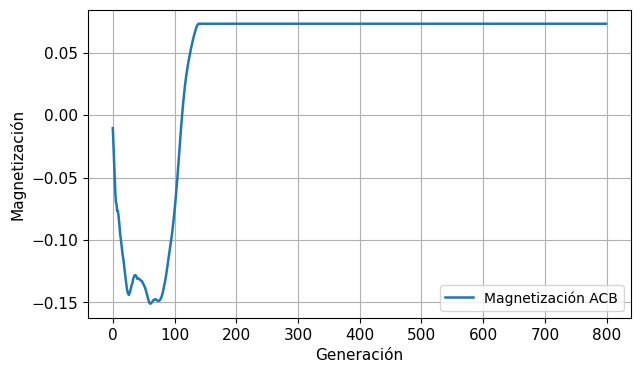

In [31]:
magnetizacion(automata)
graficar_magnetizacion(automata)

### Energía:

In [41]:
def energia(generacion):
    tamano = generacion.shape[0]
    energia = 0
    
    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(generacion, i, j, 1)
            energia += -0.5*np.sum(vecindad)*generacion[i,j]
    
    return energia

In [35]:
def graficar_energia(automata):
    energias = [energia(generacion) for generacion in automata]
    plt.plot(energias)
    plt.xlabel('Generación')
    plt.ylabel('Energía')
    plt.grid(True)
    plt.show()